In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from unidecode import unidecode
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
df_prof = pd.read_csv('Proficiencia_SARESP_2021_por_escola.csv', ';', decimal=",", encoding='latin-1')
df_prof.describe()

,DEPADM,DepBol,codRMet,CODESC,cod_per,co_comp,medprof
count,25977.0,25977.0,25977.000000,25977.000000,25977.0,25977.000000,25974.000000
mean,1.0,1.0,3.115833,281105.579859,9.0,3.333333,249.337345
std,0.0,0.0,2.023370,392330.816624,0.0,2.624720,26.680315
min,1.0,1.0,1.000000,12.000000,9.0,1.000000,138.200000
25%,1.0,1.0,1.000000,16780.000000,9.0,1.000000,234.300000
50%,1.0,1.0,3.000000,36274.000000,9.0,2.000000,252.700000
75%,1.0,1.0,5.000000,901507.000000,9.0,7.000000,267.500000
max,1.0,1.0,7.000000,926103.000000,9.0,7.000000,373.200000


In [2]:
df_prof_em = df_prof[df_prof["SERIE_ANO"]=="EM-3ª série"]
df_prof_em = df_prof_em[["medprof","CODESC"]].groupby(["CODESC"]).sum()

{'whiskers': [<matplotlib.lines.Line2D at 0x22eb020fe80>,
 'caps': [<matplotlib.lines.Line2D at 0x22eb0226580>,
 'boxes': [<matplotlib.lines.Line2D at 0x22eb020fb20>],
 'medians': [<matplotlib.lines.Line2D at 0x22eb0226c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x22eb0226fa0>],
 'means': []}

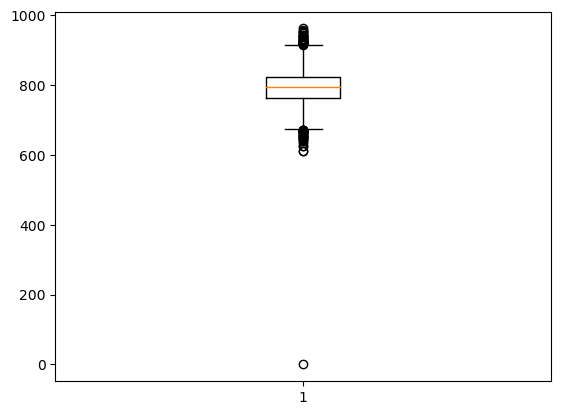

In [3]:
plt.boxplot(df_prof_em["medprof"])

In [4]:
df_inse = pd.read_csv('INSE_2019_ESCOLAS.csv', ';', decimal=",", encoding='latin-1')
df_inse = df_inse[["NOMESC","NIVEL SOCIOECONOMICO DOS ALUNOS","MUN","COD_ESC"]]
df_inse

,NOMESC,NIVEL SOCIOECONOMICO DOS ALUNOS,MUN,COD_ESC
0,HELEN KELLER,5.31,ADAMANTINA,30806
1,DURVALINO GRION PROF,5.36,ADAMANTINA,31045
2,EUDECIO LUIZ VICENTE PROF ETEC,5.78,ADAMANTINA,31082
3,HERVAL BELLUSCI ENGENHEIRO ETEC,5.39,ADAMANTINA,31100
4,FLEURIDES CAVALLINI MENECHINO PROFA,5.54,ADAMANTINA,31112
...,...,...,...,...
10197,ESCOLA MUNICIPAL DE EDUCACAO BASICA CARLOS NAT...,5.39,ESTIVA GERBI,6278
10198,AGENOR DE CARVALHO CAPITAO,5.31,ESTIVA GERBI,20382
10199,ADELIA CALEFFI GERBI EMEF,5.34,ESTIVA GERBI,222318
10200,EVALDO JOSE ZENARI EMEF,5.58,ESTIVA GERBI,277241


In [5]:
df_idesp = pd.read_csv('IDESP_ESCOLA_2021.csv', ';', decimal=",")
df_idesp_em = df_idesp[["NomeEscola","NomeMunicipio","ENSINO_MÉDIO"]].dropna()
df_idesp_em.describe()

,ENSINO_MÉDIO
count,3613.000000
mean,2.055945
std,0.676132
min,0.000000
25%,1.610000
50%,2.000000
75%,2.450000
max,4.680000


In [6]:
df_leitos_sus = pd.read_csv('saude_leitos_mun_ano.csv', ';', decimal=",", encoding="latin1")
df_leitos_sus = df_leitos_sus[(df_leitos_sus.ano == 2019)]
df_leitos_sus = df_leitos_sus[["cod_ibge","leitos_sus"]]
df_leitos_sus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 9 to 6459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cod_ibge    645 non-null    float64
 1   leitos_sus  646 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 15.1 KB


In [7]:
df_pib = pd.read_csv('econ_pib.csv', ';', decimal=",",encoding="latin1", thousands='.')
df_pib = df_pib[["cod_Ibge","setor","valor"]].pivot(index='cod_Ibge',columns='setor', values='valor')
df_pib = df_pib[["PIB per capita"]]
df_pib

setor,PIB per capita
cod_Ibge,
3500105,"37073,28"
3500204,"39658,07"
3500303,"32364,73"
3500402,"23953,84"
3500501,"27042,39"
...,...
3557006,"28586,67"
3557105,"36770,23"
3557154,"44155,19"


In [8]:
df_comex = pd.read_csv('econ_comex.csv', ';', decimal=",", encoding='latin1')
df_comex = df_comex[["Cod_IBGE","Valor das Exportações (US$ FOB)","Valor das Importações (US$ FOB)"]]
df_comex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cod_IBGE                         645 non-null    float64
 1   Valor das Exportações (US$ FOB)  646 non-null    int64  
 2   Valor das Importações (US$ FOB)  646 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 15.3 KB


In [9]:
df_med = pd.read_csv('saude_med_enf_mun_ultano.csv', ';', decimal=",", encoding='latin-1')
df_med = df_med[["cod_ibge","prof_sus","prof_nsus","prof_tot","medenf","prof_habitante"]].pivot_table(index='cod_ibge',columns='medenf', values=['prof_sus','prof_nsus','prof_tot','prof_habitante'])
df_med.columns = df_med.columns.map('{0[0]}_{0[1]}'.format) 
df_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 3500105 to 3557303
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   prof_habitante_Enfermeiro  645 non-null    float64
 1   prof_habitante_Médico      645 non-null    float64
 2   prof_nsus_Enfermeiro       645 non-null    int64  
 3   prof_nsus_Médico           645 non-null    int64  
 4   prof_sus_Enfermeiro        645 non-null    int64  
 5   prof_sus_Médico            645 non-null    int64  
 6   prof_tot_Enfermeiro        645 non-null    int64  
 7   prof_tot_Médico            645 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 45.4 KB


In [10]:
df_pop = pd.read_csv('populacao_municipal.csv', ';', decimal=",", encoding="latin1")
df_pop = df_pop[(df_pop.ano == 2021)]
df_pop = df_pop[["cod_ibge","municipio","populacao"]]
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 21 to 14189
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cod_ibge   645 non-null    int64 
 1   municipio  645 non-null    object
 2   populacao  645 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.2+ KB


In [11]:
df_completo = pd.merge(df_pop,df_leitos_sus, on="cod_ibge", how="left")
df_completo = pd.merge(df_completo,df_pib,left_on="cod_ibge",right_on="cod_Ibge", how="left")
df_completo = pd.merge(df_completo,df_med,on="cod_ibge", how="left")
df_completo = pd.merge(df_completo,df_comex, right_on="Cod_IBGE",left_on="cod_ibge", how="left")
df_completo

,cod_ibge,municipio,populacao,leitos_sus,PIB per capita,prof_habitante_Enfermeiro,prof_habitante_Médico,prof_nsus_Enfermeiro,prof_nsus_Médico,prof_sus_Enfermeiro,prof_sus_Médico,prof_tot_Enfermeiro,prof_tot_Médico,Cod_IBGE,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB)
0,3500105,Adamantina,33869,206,"37073,28",2.33,4.460,3,21,76,130,79,151,3500105.0,20915821,697487
1,3500204,Adolfo,3436,0,"39658,07",1.46,10.800,0,0,5,37,5,37,3500204.0,0,0
2,3500303,Aguaí,35885,0,"32364,73",0.58,1.990,0,23,21,49,21,72,3500303.0,137409,32478066
3,3500402,Águas da Prata,7807,0,"23953,84",0.90,3.580,1,3,6,25,7,28,3500402.0,0,23864
4,3500501,Águas de Lindóia,18438,30,"27042,39",0.92,2.810,1,10,16,42,17,52,3500501.0,0,583748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,3556909,Vista Alegre do Alto,8091,0,"50437,02",0.98,0.610,0,0,8,5,8,5,3556909.0,52195826,4940
641,3556958,Vitória Brasil,1761,0,"24171,39",1.14,0.000,0,0,2,0,2,0,3556958.0,0,0
642,3557006,Votorantim,120662,53,"28586,67",0.72,0.560,22,32,65,36,87,68,3557006.0,16870790,29960178
643,3557105,Votuporanga,92193,115,"36770,23",2.64,3.580,29,74,216,258,245,332,3557105.0,9612819,2832675


In [12]:
df_completo["municipio"] = df_completo["municipio"].map(unidecode)
df_completo["municipio"] = df_completo["municipio"].str.upper()
df_completo.head()

,cod_ibge,municipio,populacao,leitos_sus,PIB per capita,prof_habitante_Enfermeiro,prof_habitante_Médico,prof_nsus_Enfermeiro,prof_nsus_Médico,prof_sus_Enfermeiro,prof_sus_Médico,prof_tot_Enfermeiro,prof_tot_Médico,Cod_IBGE,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB)
0,3500105,ADAMANTINA,33869,206,"37073,28",2.33,4.46,3,21,76,130,79,151,3500105.0,20915821,697487
1,3500204,ADOLFO,3436,0,"39658,07",1.46,10.80,0,0,5,37,5,37,3500204.0,0,0
2,3500303,AGUAI,35885,0,"32364,73",0.58,1.99,0,23,21,49,21,72,3500303.0,137409,32478066
3,3500402,AGUAS DA PRATA,7807,0,"23953,84",0.90,3.58,1,3,6,25,7,28,3500402.0,0,23864
4,3500501,AGUAS DE LINDOIA,18438,30,"27042,39",0.92,2.81,1,10,16,42,17,52,3500501.0,0,583748


In [13]:
df_comp_em = pd.merge(df_idesp_em, df_completo, left_on="NomeMunicipio", right_on="municipio")
df_comp_em = df_comp_em.drop("NomeMunicipio", axis=1)
df_comp_em.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3610 entries, 0 to 3609
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NomeEscola                       3610 non-null   object 
 1   ENSINO_MÉDIO                     3610 non-null   float64
 2   cod_ibge                         3610 non-null   int64  
 3   municipio                        3610 non-null   object 
 4   populacao                        3610 non-null   int64  
 5   leitos_sus                       3610 non-null   int64  
 6   PIB per capita                   3610 non-null   object 
 7   prof_habitante_Enfermeiro        3610 non-null   float64
 8   prof_habitante_Médico            3610 non-null   float64
 9   prof_nsus_Enfermeiro             3610 non-null   int64  
 10  prof_nsus_Médico                 3610 non-null   int64  
 11  prof_sus_Enfermeiro              3610 non-null   int64  
 12  prof_sus_Médico     

In [14]:
df_comp_em["mergecolumn"] = df_comp_em["NomeEscola"]+"|"+df_comp_em["municipio"]
df_inse["mergecolumn"] = df_inse["NOMESC"]+"|"+df_inse["MUN"]
df_comp_em_inse = pd.merge(df_inse, df_comp_em, on="mergecolumn")
df_comp_em_inse = pd.merge(df_comp_em_inse, df_prof_em, how="left", right_on="CODESC", left_on="COD_ESC")
df_comp_em_inse = df_comp_em_inse.set_index('mergecolumn')
df_comp_em_inse = df_comp_em_inse.dropna()

In [15]:
df_comp_em_inse[(df_comp_em_inse['municipio']=='SAO PAULO')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, GAVIAO PEIXOTO BRIGADEIRO|SAO PAULO to BARRO BRANCO II|SAO PAULO
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NOMESC                           582 non-null    object 
 1   NIVEL SOCIOECONOMICO DOS ALUNOS  582 non-null    float64
 2   MUN                              582 non-null    object 
 3   COD_ESC                          582 non-null    int64  
 4   NomeEscola                       582 non-null    object 
 5   ENSINO_MÉDIO                     582 non-null    float64
 6   cod_ibge                         582 non-null    int64  
 7   municipio                        582 non-null    object 
 8   populacao                        582 non-null    int64  
 9   leitos_sus                       582 non-null    int64  
 10  PIB per capita                   582 non-null    object 
 11  prof_habitante_Enfermeiro        

In [16]:
df_comp_em_inse = df_comp_em_inse[(df_comp_em_inse['municipio']!='SAO PAULO')]
df_comp_em_inse = df_comp_em_inse.drop("NomeEscola", axis = 1)
df_comp_em_inse = df_comp_em_inse.drop("municipio", axis = 1)
df_comp_em_inse = df_comp_em_inse.drop("cod_ibge", axis = 1)
df_comp_em_inse

,NOMESC,NIVEL SOCIOECONOMICO DOS ALUNOS,MUN,COD_ESC,ENSINO_MÉDIO,populacao,leitos_sus,PIB per capita,prof_habitante_Enfermeiro,prof_habitante_Médico,prof_nsus_Enfermeiro,prof_nsus_Médico,prof_sus_Enfermeiro,prof_sus_Médico,prof_tot_Enfermeiro,prof_tot_Médico,Cod_IBGE,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB),medprof
mergecolumn,,,,,,,,,,,,,,,,,,,,
HELEN KELLER|ADAMANTINA,HELEN KELLER,5.31,ADAMANTINA,30806,1.41,33869,206,"37073,28",2.33,4.460,3,21,76,130,79,151,3500105.0,20915821,697487,729.8
DURVALINO GRION PROF|ADAMANTINA,DURVALINO GRION PROF,5.36,ADAMANTINA,31045,1.67,33869,206,"37073,28",2.33,4.460,3,21,76,130,79,151,3500105.0,20915821,697487,775.5
FLEURIDES CAVALLINI MENECHINO PROFA|ADAMANTINA,FLEURIDES CAVALLINI MENECHINO PROFA,5.54,ADAMANTINA,31112,1.19,33869,206,"37073,28",2.33,4.460,3,21,76,130,79,151,3500105.0,20915821,697487,730.8
ODILA BOVOLENTA DE MENDONCA PROFESSORA|ADOLFO,ODILA BOVOLENTA DE MENDONCA PROFESSORA,4.71,ADOLFO,27352,1.59,3436,0,"39658,07",1.46,10.800,0,0,5,37,5,37,3500204.0,0,0,704.5
JOSE THEODORO DE MORAES|AGUAI,JOSE THEODORO DE MORAES,4.89,AGUAI,20515,1.27,35885,0,"32364,73",0.58,1.990,0,23,21,49,21,72,3500303.0,137409,32478066,757.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEBASTIAO ALMEIDA OLIVEIRA|VOTUPORANGA,SEBASTIAO ALMEIDA OLIVEIRA,5.52,VOTUPORANGA,918349,2.06,92193,115,"36770,23",2.64,3.580,29,74,216,258,245,332,3557105.0,9612819,2832675,813.0
MARIA NIVEA COSTA PINTO FREITAS PROFA|VOTUPORANGA,MARIA NIVEA COSTA PINTO FREITAS PROFA,5.53,VOTUPORANGA,919697,2.59,92193,115,"36770,23",2.64,3.580,29,74,216,258,245,332,3557105.0,9612819,2832675,829.3
ANTONIO TEIXEIRA DOS SANTOS|ZACARIAS,ANTONIO TEIXEIRA DOS SANTOS,4.97,ZACARIAS,27418,2.14,2574,0,"44155,19",1.88,0.375,0,0,5,1,5,1,3557154.0,0,0,811.2


In [17]:
df_final = df_comp_em_inse[['NIVEL SOCIOECONOMICO DOS ALUNOS','ENSINO_MÉDIO','populacao','leitos_sus','PIB per capita','prof_habitante_Enfermeiro','prof_habitante_Médico','medprof',"Valor das Exportações (US$ FOB)","Valor das Importações (US$ FOB)"]]
df_final['PIB per capita'] = df_final['PIB per capita'].str.replace(',','.').astype(float)
df_final['profsaude_habitante'] = df_final['prof_habitante_Enfermeiro'] + df_final['prof_habitante_Médico']
df_final = df_final.drop('prof_habitante_Enfermeiro', axis=1)
df_final = df_final.drop('prof_habitante_Médico', axis=1)
df_final

C:\Users\tiago\AppData\Local\Temp\ipykernel_24836\165956680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['PIB per capita'] = df_final['PIB per capita'].str.replace(',','.').astype(float)
C:\Users\tiago\AppData\Local\Temp\ipykernel_24836\165956680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['profsaude_habitante'] = df_final['prof_habitante_Enfermeiro'] + df_final['prof_habitante_Médico']


,NIVEL SOCIOECONOMICO DOS ALUNOS,ENSINO_MÉDIO,populacao,leitos_sus,PIB per capita,medprof,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB),profsaude_habitante
mergecolumn,,,,,,,,,
HELEN KELLER|ADAMANTINA,5.31,1.41,33869,206,37073.28,729.8,20915821,697487,6.790
DURVALINO GRION PROF|ADAMANTINA,5.36,1.67,33869,206,37073.28,775.5,20915821,697487,6.790
FLEURIDES CAVALLINI MENECHINO PROFA|ADAMANTINA,5.54,1.19,33869,206,37073.28,730.8,20915821,697487,6.790
ODILA BOVOLENTA DE MENDONCA PROFESSORA|ADOLFO,4.71,1.59,3436,0,39658.07,704.5,0,0,12.260
JOSE THEODORO DE MORAES|AGUAI,4.89,1.27,35885,0,32364.73,757.4,137409,32478066,2.570
...,...,...,...,...,...,...,...,...,...
SEBASTIAO ALMEIDA OLIVEIRA|VOTUPORANGA,5.52,2.06,92193,115,36770.23,813.0,9612819,2832675,6.220
MARIA NIVEA COSTA PINTO FREITAS PROFA|VOTUPORANGA,5.53,2.59,92193,115,36770.23,829.3,9612819,2832675,6.220
ANTONIO TEIXEIRA DOS SANTOS|ZACARIAS,4.97,2.14,2574,0,44155.19,811.2,0,0,2.255


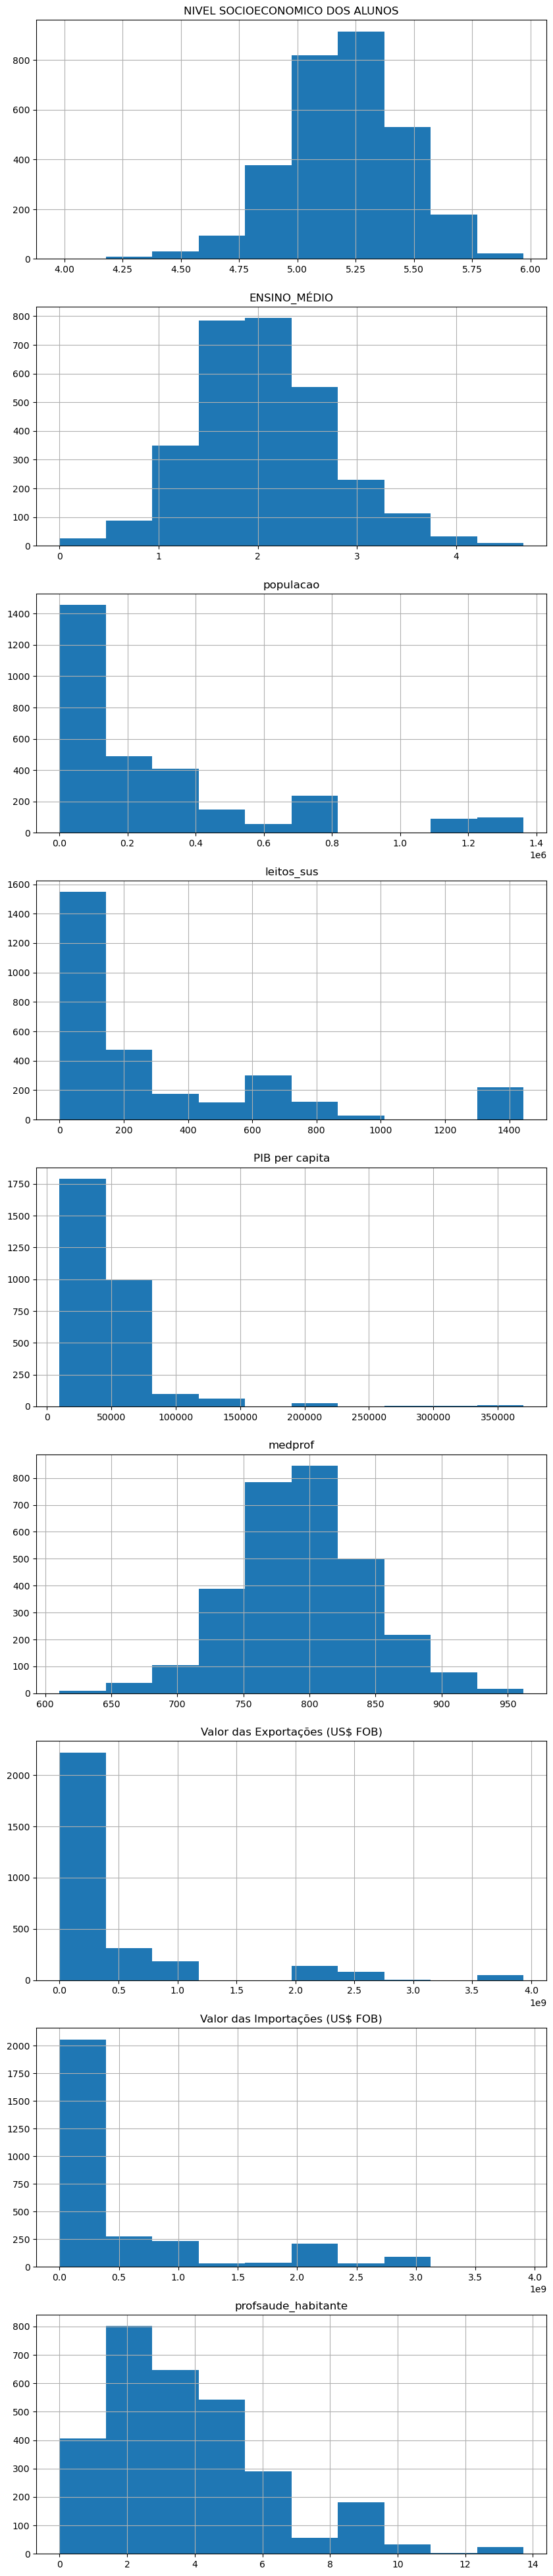

In [18]:
i = 1
plt.figure(figsize=(10, 50))
for name in df_final.columns:
    ax = plt.subplot((len(df_final.columns)*100)+10+i)
    ax.title.set_text((name))
    plt.hist(df_final[name])
    i+=1
    plt.grid()
plt.show()

In [19]:
df_final.describe()

,NIVEL SOCIOECONOMICO DOS ALUNOS,ENSINO_MÉDIO,populacao,leitos_sus,PIB per capita,medprof,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB),profsaude_habitante
count,2980.000000,2980.000000,2.980000e+03,2980.000000,2980.000000,2980.000000,2.980000e+03,2.980000e+03,2980.000000
mean,5.204648,2.052990,2.758592e+05,301.129530,46182.214698,794.271946,4.010036e+08,4.901327e+08,3.733062
std,0.252326,0.684934,3.354106e+05,389.895702,32799.276053,49.547802,7.717461e+08,8.045442e+08,2.369833
min,3.980000,0.000000,8.110000e+02,0.000000,9875.700000,610.800000,0.000000e+00,0.000000e+00,0.000000
25%,5.040000,1.600000,3.914650e+04,36.000000,28944.405000,762.500000,7.715453e+06,1.719048e+06,1.817500
50%,5.210000,2.000000,1.486130e+05,115.000000,41136.270000,792.800000,6.626382e+07,6.113253e+07,3.205000
75%,5.370000,2.452500,3.749970e+05,488.000000,54481.952500,824.400000,4.343216e+08,5.729570e+08,5.090000
max,5.970000,4.680000,1.361862e+06,1444.000000,369866.410000,961.900000,3.933048e+09,3.904772e+09,13.720000


In [20]:
minMaxScaler = preprocessing.MinMaxScaler((0,1))
df_scaled = pd.DataFrame(minMaxScaler.fit_transform(df_final), columns=df_final.columns, index=df_final.index)
df_scaled

,NIVEL SOCIOECONOMICO DOS ALUNOS,ENSINO_MÉDIO,populacao,leitos_sus,PIB per capita,medprof,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB),profsaude_habitante
mergecolumn,,,,,,,,,
HELEN KELLER|ADAMANTINA,0.668342,0.301282,0.024289,0.142659,0.075551,0.338935,0.005318,0.000179,0.494898
DURVALINO GRION PROF|ADAMANTINA,0.693467,0.356838,0.024289,0.142659,0.075551,0.469097,0.005318,0.000179,0.494898
FLEURIDES CAVALLINI MENECHINO PROFA|ADAMANTINA,0.783920,0.254274,0.024289,0.142659,0.075551,0.341783,0.005318,0.000179,0.494898
ODILA BOVOLENTA DE MENDONCA PROFESSORA|ADOLFO,0.366834,0.339744,0.001929,0.000000,0.082731,0.266876,0.000000,0.000000,0.893586
JOSE THEODORO DE MORAES|AGUAI,0.457286,0.271368,0.025770,0.000000,0.062471,0.417545,0.000035,0.008318,0.187318
...,...,...,...,...,...,...,...,...,...
SEBASTIAO ALMEIDA OLIVEIRA|VOTUPORANGA,0.773869,0.440171,0.067141,0.079640,0.074709,0.575904,0.002444,0.000725,0.453353
MARIA NIVEA COSTA PINTO FREITAS PROFA|VOTUPORANGA,0.778894,0.553419,0.067141,0.079640,0.074709,0.622330,0.002444,0.000725,0.453353
ANTONIO TEIXEIRA DOS SANTOS|ZACARIAS,0.497487,0.457265,0.001295,0.000000,0.095223,0.570778,0.000000,0.000000,0.164359


In [21]:
inertia_infra = []
inertia_edu = []
maxMeans = 10
labels_infra = []
labels_edu = []
df_infra = df_scaled[['NIVEL SOCIOECONOMICO DOS ALUNOS','populacao','leitos_sus','PIB per capita','profsaude_habitante',
                      "Valor das Exportações (US$ FOB)","Valor das Importações (US$ FOB)"]]
df_edu = df_scaled[['ENSINO_MÉDIO','medprof']]
for i in range(2, maxMeans+1): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df_infra) 
    inertia_infra.append(kmeans.inertia_)
    label=kmeans.predict(df_infra)
    labels_infra.append(label)
for i in range(2, maxMeans+1): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df_edu) 
    inertia_edu.append(kmeans.inertia_)
    label=kmeans.predict(df_edu)
    labels_edu.append(label)

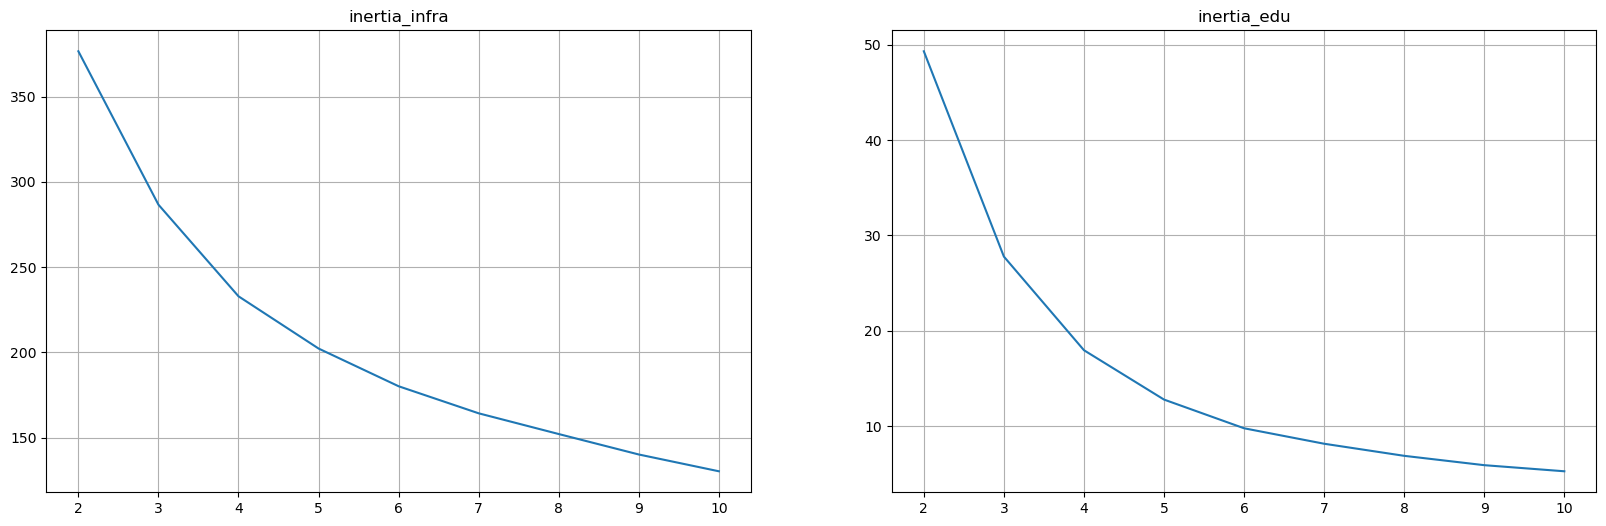

In [22]:
x_axis = range(2, maxMeans+1)
plt.figure(figsize=(20, 6))
ax = plt.subplot(121)
ax.title.set_text('inertia_infra')
plt.plot(x_axis, inertia_infra)
plt.grid()
ax = plt.subplot(122)
ax.title.set_text('inertia_edu')
plt.plot(x_axis, inertia_edu)
plt.grid()
plt.show()

In [23]:
nclusters=3
df_mapped = df_final
df_mapped['infra'] = labels_infra[nclusters-2]
df_mapped['edu'] = labels_edu[nclusters-2]
df_report_edu = df_mapped[['ENSINO_MÉDIO', 'medprof', 'edu']].groupby('edu').mean()
df_report_edu

,ENSINO_MÉDIO,medprof
edu,,
0,2.112364,800.468460
1,3.055973,864.269113
2,1.324147,740.152268


In [24]:
df_report_infra = df_mapped[['NIVEL SOCIOECONOMICO DOS ALUNOS', 'populacao','leitos_sus','PIB per capita',
                             'profsaude_habitante','infra',"Valor das Exportações (US$ FOB)",
                             "Valor das Importações (US$ FOB)"]].groupby('infra').mean()
df_report_infra

,NIVEL SOCIOECONOMICO DOS ALUNOS,populacao,leitos_sus,PIB per capita,profsaude_habitante,Valor das Exportações (US$ FOB),Valor das Importações (US$ FOB)
infra,,,,,,,
0,5.273957,997411.902439,1077.869919,54220.156098,5.671707,2.053733e+09,2.183979e+09
1,5.299550,363860.973013,517.560720,63123.449610,6.132249,3.807376e+08,5.865331e+08
2,5.158930,108703.718107,79.433642,38843.838122,2.541901,9.424457e+07,1.355400e+08


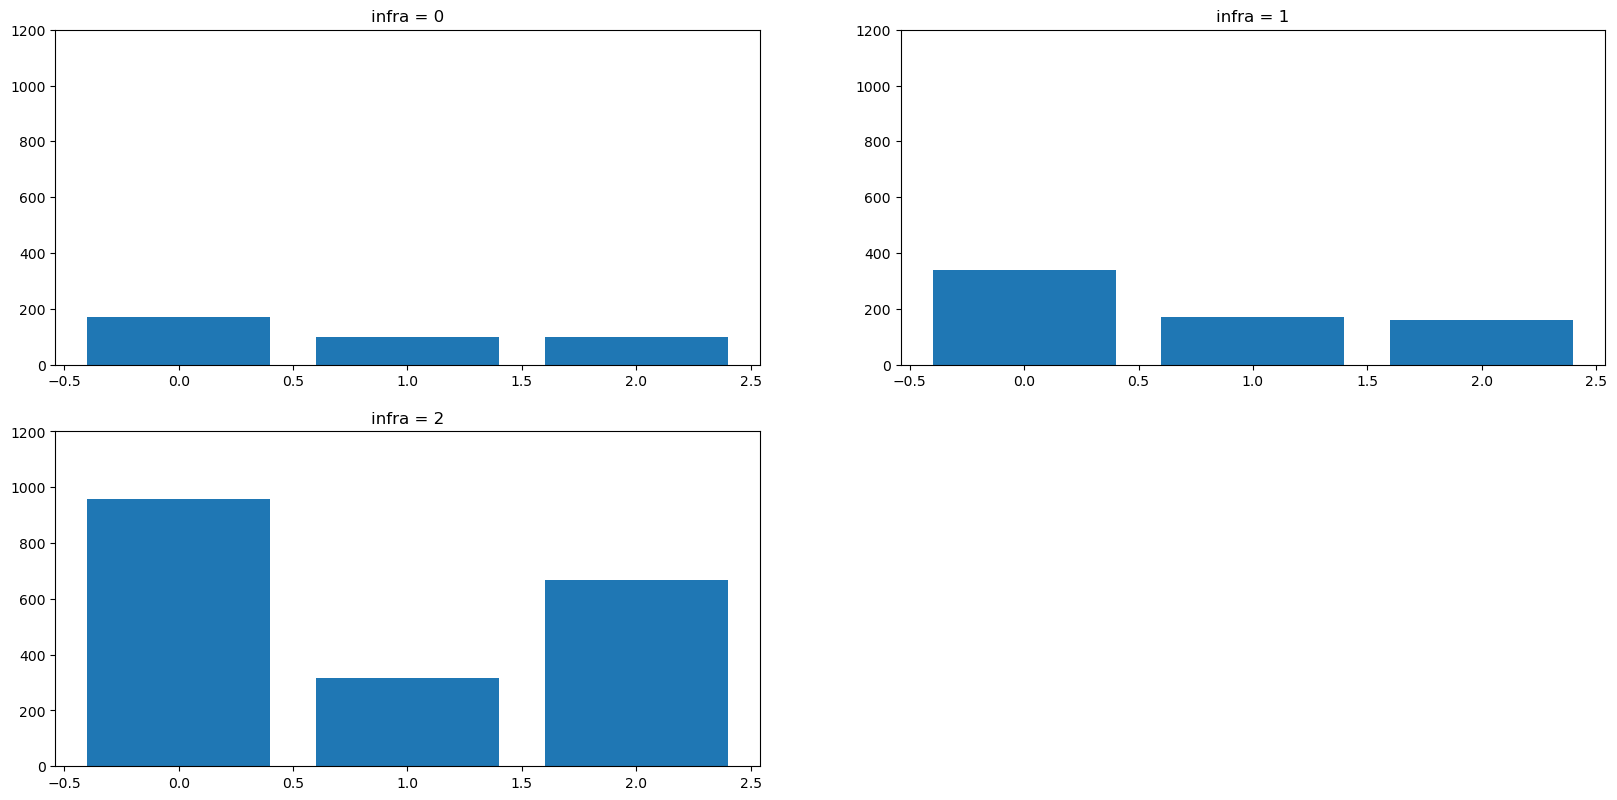

In [25]:
names = range(0,nclusters)
ylim = 1200

i = 1
plt.figure(figsize=(20, 20))
for i in range(0,nclusters):
    ax = plt.subplot(420+i+1)
    ax.title.set_text(f'infra = {i}')
    plt.bar(names, df_mapped[(df_mapped['infra'] == i)].groupby('edu').count()['infra'])
    plt.ylim(0, ylim)
    i+=1
plt.show()

In [26]:
prop = []
for i in range(0,nclusters):
    edu = df_mapped[(df_mapped['infra'] == i)].groupby('edu').count()['infra']
    prop.append(edu[2]/edu[1])
prop

[1.0, 0.9294117647058824, 2.110410094637224]

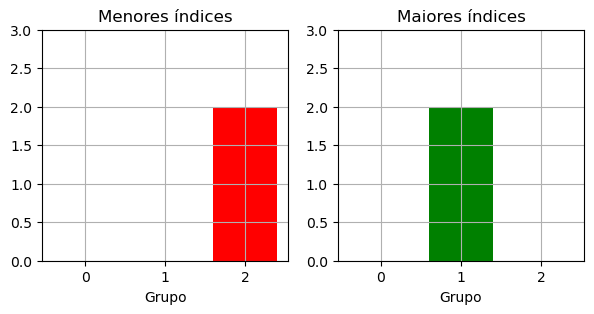

In [27]:
min_edu=np.zeros(nclusters)
max_edu=np.zeros(nclusters)
for column in df_report_edu.columns:
    min_index = df_report_edu[column].idxmin()
    max_index = df_report_edu[column].idxmax()
    min_edu[min_index] += 1
    max_edu[max_index] += 1
names = []
for i in range(0,nclusters):
    names.append(str(i))
plt.figure(figsize=(7, 3))
ax = plt.subplot(121)
ax.title.set_text('Menores índices')
ax.set_xlabel('Grupo')
plt.bar(names, min_edu, color='red')
plt.ylim(0, 3)
plt.grid()
ax = plt.subplot(122)
ax.title.set_text('Maiores índices')
ax.set_xlabel('Grupo')
plt.bar(names, max_edu, color='green')
plt.ylim(0, 3)
plt.grid()
plt.show()

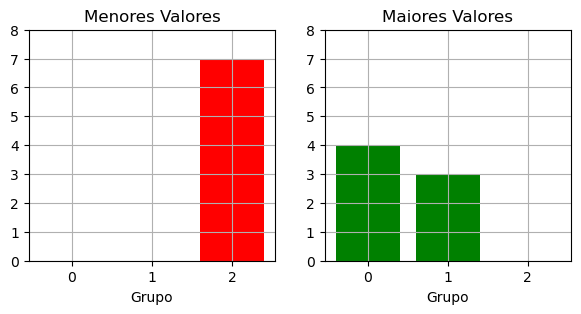

In [28]:
min_infra=np.zeros(nclusters)
max_infra=np.zeros(nclusters)
for column in df_report_infra.columns:
    min_index = df_report_infra[column].idxmin()
    max_index = df_report_infra[column].idxmax()
    min_infra[min_index] += 1
    max_infra[max_index] += 1
plt.figure(figsize=(7, 3))
ax = plt.subplot(121)
ax.title.set_text('Menores Valores')
plt.bar(names, min_infra, color='red')
ax.set_xlabel('Grupo')
plt.ylim(0, 8)
plt.grid()
ax = plt.subplot(122)
ax.title.set_text('Maiores Valores')
plt.bar(names, max_infra, color='green')
ax.set_xlabel('Grupo')
plt.ylim(0, 8)
plt.grid()
plt.show()

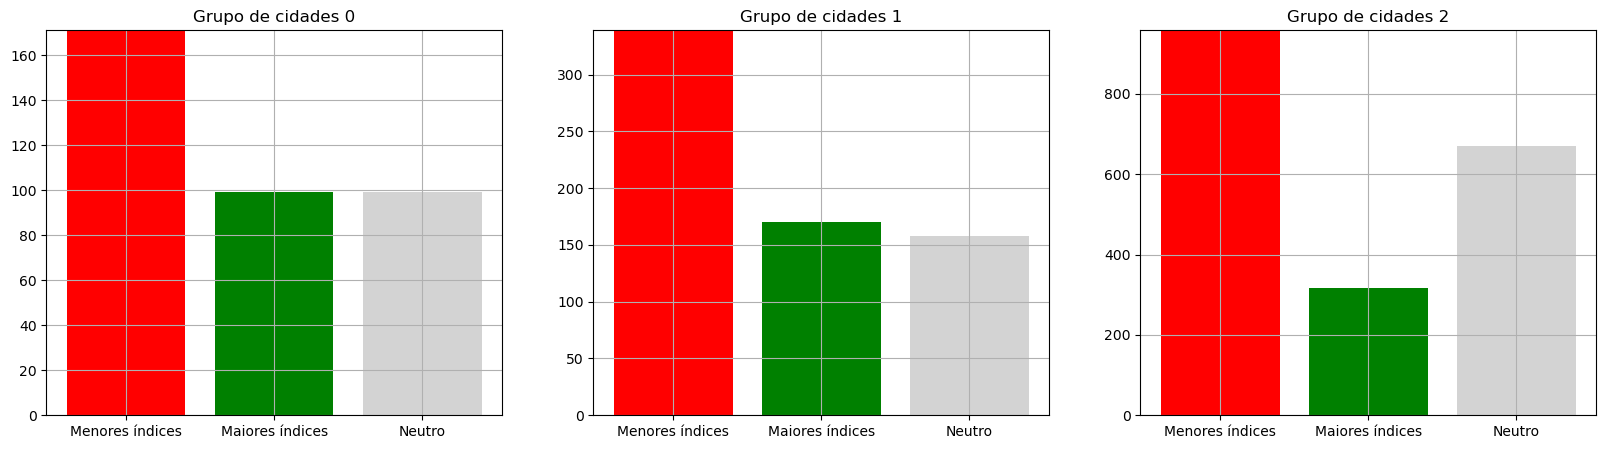

In [29]:
i = 1
plt.figure(figsize=(20, 5))
rotulos_x = ("Menores índices", "Maiores índices", "Neutro")
for i in range(0,nclusters):
    df_plot = df_mapped[(df_mapped['infra'] == i)].groupby('edu').count()['infra']
    ax = plt.subplot(130+i+1)
    ax.title.set_text(f'Grupo de cidades {i}')
    plt.bar(rotulos_x, df_plot, color=['red','green','lightgray'])
    plt.ylim(0, max(df_plot))
    plt.grid()
    i+=1
plt.show()

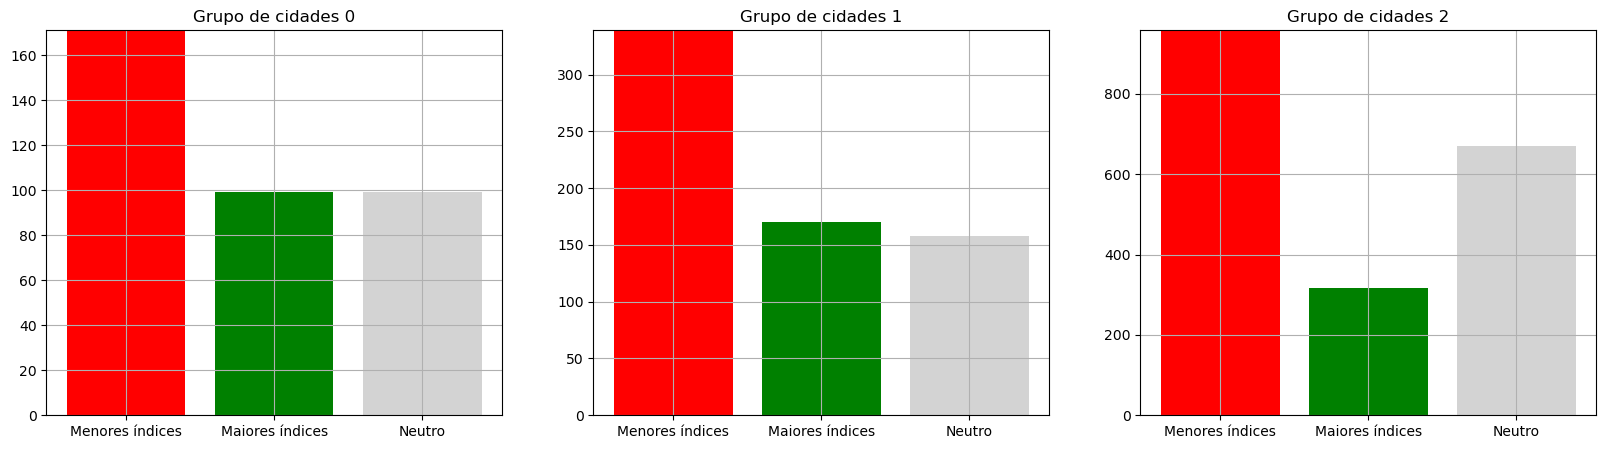

In [30]:
i = 1
plt.figure(figsize=(20, 5))
rotulos_x = ("Menores índices", "Maiores índices", "Neutro")
for i in range(0,nclusters):
    df_plot = df_mapped[(df_mapped['infra'] == i)].groupby('edu').count()['infra']
    ax = plt.subplot(130+i+1)
    ax.title.set_text(f'Grupo de cidades {i}')
    plt.bar(rotulos_x, df_plot, color=['red','green','lightgray'])
    plt.ylim(0, max(df_plot))
    plt.grid()
    i+=1
plt.show()